### Project 2 (Alternate) : McCurr Consultancy – Attrition Analysis

#### Background:
McCurr Consultancy is an MNC that has thousands of employees spread across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources is spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in characteristics of employees who leave the organization. Also, you have to use this information to predict if an employee is at risk of attrition. This information will be used to target them with incentives and in turn curb attrition. 

#### Objective:
To predict if an employee is going to attrite or not 

#### Data:
The data contains demographic details, work-related metrics and attrition flag.


### 1. Load/Import the datasets and libraries and Check: datatype, statistical summary, shape, null values or incorrect imputations. (5 marks)

#### Import Key Libraries

In [ ]:
# Importing Key Libraries

import numpy as np
import pandas as pd
import dateutil
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
sns.set(style="whitegrid", palette="hsv")
import warnings
warnings.filterwarnings("ignore")
from PIL import Image

import pandas_profiling
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

#### Import HR Dataset, checking of datatype, statistical summary, shap, null values and/or incorrect imputations (5 marks)

In [ ]:
# Import HR Dataset

HR_Data = pd.read_excel('E:/pgp02B_projects/HR_Employee_Attrition_Dataset.xlsx')
print (HR_Data)

In [ ]:
# Show number of rows and columns

print(HR_Data.shape)

#### Shows the dataset has 2940 rows and 34 columns

In [4]:
print(HR_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
EmployeeNumber              2940 non-null int64
Attrition                   2940 non-null object
Age                         2940 non-null int64
BusinessTravel              2940 non-null object
DailyRate                   2940 non-null int64
Department                  2940 non-null object
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null object
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null object
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null object
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null object
MonthlyIncome               2940 non-null int64
MonthlyRate           

In [5]:
# Check for Null Values in the data set

HR_Data.isnull().values.any()

False

In [6]:
# Check and detect anomalies (i.e. missing values)

HR_Data.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

#### Observation: There are no Null Values, i.e. no missing values in the rows and columns. All variables have 2940 entries, so we don't have to include any missing values treatment.

In [7]:
HR_Data.head()

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                        1             80   
1                        3  ...                        4             80   
2                        4  ...                        2             80   
3                        4  ...                        3             80   
4                        1  ...                        4             80   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 34 columns]

In [8]:
# Checking the number of unique values in the columns
HR_Data.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

#### Observations:

1. Age - Unique values are 43 ---> Staff profile is composed of all ages from the minimum (18) to the maximum (60).
2. DailyRate (886); MonthlyIncome (1349) & MonthlyRate (1427) ---> there is a big variation or disparity for the income from teh daily rate to monthly rate & income.


#### To eliminate data noise, we will drop variables (columns) that we do not need, i.e. the Employee number which is unique for all satff and is not required for predicting attrition.

In [9]:
# Drop EmployeeNumber Column

HR_Data2 = HR_Data.drop(['EmployeeNumber'], axis=1)

In [10]:
HR_Data2.head(10)

Attrition  Age     BusinessTravel  DailyRate              Department  \
0       Yes   41      Travel_Rarely       1102                   Sales   
1        No   49  Travel_Frequently        279  Research & Development   
2       Yes   37      Travel_Rarely       1373  Research & Development   
3        No   33  Travel_Frequently       1392  Research & Development   
4        No   27      Travel_Rarely        591  Research & Development   
5        No   32  Travel_Frequently       1005  Research & Development   
6        No   59      Travel_Rarely       1324  Research & Development   
7        No   30      Travel_Rarely       1358  Research & Development   
8        No   38  Travel_Frequently        216  Research & Development   
9        No   36      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   
5                 2          2  Life Sciences                        4   
6                 3          3        Medical                        3   
7                24          1  Life Sciences                        4   
8                23          3  Life Sciences                        4   
9                27          3        Medical                        3   

   Gender  ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0  Female  ...                         1             80                 0   
1    Male  ...                         4             80                 1   
2    Male  ...                         2             80                 0   
3  Female  ...                         3             80                 0   
4    Male  ...                         4             80                 1   
5    Male  ...                         3             80                 0   
6  Female  ...                         1             80                 3   
7    Male  ...                         2             80                 1   
8    Male  ...                         2             80                 0   
9    Male  ...                         2             80                 2   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   
5                 8                      2               2               7   
6                12                      3               2               1   
7                 1                      2               3               1   
8                10                      2               3               9   
9                17                      3               2               7   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  
5                   7                        3                    6  
6                   0                        0                    0  
7                   0                        0                    0  
8                   7              

In [11]:
HR_Data2.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  2940.000000  2940.000000       2940.000000  2940.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.133819   403.440447          8.105485     1.023991   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              2940.000000  2940.000000     2940.000000  2940.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.092896    20.325969        0.711440     1.106752   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    84.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  RelationshipSatisfaction  \
count      2940.000000    2940.000000  ...               2940.000000   
mean          2.728571    6502.931293  ...                  2.712245   
std           1.102658    4707.155770  ...                  1.081025   
min           1.000000    1009.000000  ...                  1.000000   
25%           2.000000    2911.000000  ...                  2.000000   
50%           3.000000    4919.000000  ...                  3.000000   
75%           4.000000    8380.000000  ...                  4.000000   
max           4.000000   19999.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         2940.0       2940.000000        2940.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.851932           7.779458   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            2940.000000      2940.000000     2940.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289051         0.706356        6.125483   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         2940.000000              2940.000000           2940.000000  
mean             4.229252                 2.187755              4.123129  
std              3.622521                 3.221882              3.567529  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 24 columns]

#### Observations:

1. Age - Unique values are 43 ---> Staff profile is composed of all ages from the minimum (18) to the maximum (60).
2. DailyRate (886); MonthlyIncome (1349) & MonthlyRate (1427) ---> there is a big variation or disparity for the income from teh daily rate to monthly rate & income.


#### To eliminate data noise, we will drop variables (columns) that we do not need, i.e. the Employee number which is unique for all satff and is not required for predicting attrition.

In [12]:
# Drop EmployeeNumber Column

HR_Data2 = HR_Data.drop(['EmployeeNumber'], axis=1)

In [13]:
HR_Data2.head()

Attrition  Age     BusinessTravel  DailyRate              Department  \
0       Yes   41      Travel_Rarely       1102                   Sales   
1        No   49  Travel_Frequently        279  Research & Development   
2       Yes   37      Travel_Rarely       1373  Research & Development   
3        No   33  Travel_Frequently       1392  Research & Development   
4        No   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0  Female  ...                         1             80                 0   
1    Male  ...                         4             80                 1   
2    Male  ...                         2             80                 0   
3  Female  ...                         3             80                 0   
4    Male  ...                         4             80                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 33 columns]

In [14]:
HR_Data2.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  2940.000000  2940.000000       2940.000000  2940.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.133819   403.440447          8.105485     1.023991   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              2940.000000  2940.000000     2940.000000  2940.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.092896    20.325969        0.711440     1.106752   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    84.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  RelationshipSatisfaction  \
count      2940.000000    2940.000000  ...               2940.000000   
mean          2.728571    6502.931293  ...                  2.712245   
std           1.102658    4707.155770  ...                  1.081025   
min           1.000000    1009.000000  ...                  1.000000   
25%           2.000000    2911.000000  ...                  2.000000   
50%           3.000000    4919.000000  ...                  3.000000   
75%           4.000000    8380.000000  ...                  4.000000   
max           4.000000   19999.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         2940.0       2940.000000        2940.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.851932           7.779458   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            2940.000000      2940.000000     2940.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289051         0.706356        6.125483   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         2940.000000              2940.000000           2940.000000  
mean             4.229252                 2.187755              4.123129  
std              3.622521                 3.221882              3.567529  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 24 columns]

#### Observations : for Statistical Summary

1. Age                                                 : Minimum = 18, Median = 36 and Maximum = 60 ; IQR = 25
2. Daily Rate                                          : Minimum = 102, Median = 802 and Maximum = 1499 ; IQR = 1397
3. Distance from Home                                  : Minimum = 1 and Maximum = 29
4. Years At Company (YearsAtCompany)                   : Some staff with most/longest years in company = 40
5. Years In Current Role (YearsInCurrentRole)          : Staff who has stayed longest in current role has done 18 years
6. Years Since Last Promotion (YearsSinceLastPromotion): Maximum period without promotion by staff is 15 years since promotion
7. Years With Curr Manager (YearsWithCurrManager)      : Staff who's stayed with same manager longest, has done 17 years.
8. Stock Options (StockOptionLevel)                    : Most staff are given Stock Options for insentive, with most staff in the upper 50% quartile


### EDA : Exploratory Data Analysis

### 2a. Univariant Analysis – description of the independent attributes. Strategies to address the different data challenges such as data noise, outlier’s treatment and missing values treatment. (10 marks) 

In [15]:
HR_Data2.skew()

Age                         0.413075
DailyRate                  -0.003517
DistanceFromHome            0.957629
Education                  -0.289533
EnvironmentSatisfaction    -0.321490
HourlyRate                 -0.032294
JobInvolvement             -0.498165
JobLevel                    1.024878
JobSatisfaction            -0.329504
MonthlyIncome               1.369117
MonthlyRate                 0.018568
NumCompaniesWorked          1.025947
PercentSalaryHike           0.820709
PerformanceRating           1.920901
RelationshipSatisfaction   -0.302673
StandardHours               0.000000
StockOptionLevel            0.968485
TotalWorkingYears           1.116601
TrainingTimesLastYear       0.552842
WorkLifeBalance            -0.552198
YearsAtCompany              1.763628
YearsInCurrentRole          0.916895
YearsSinceLastPromotion     1.983277
YearsWithCurrManager        0.833025
dtype: float64

#### Observation:
There is low skewing for most variables.
Noted skewing is for the variables below
1. JobLevel                    1.024878
2. MonthlyIncome               1.369117
3. NumCompaniesWorked          1.025947
4. PerformanceRating           1.920901
5. TotalWorkingYears           1.116601
6. YearsAtCompany              1.763628
7. YearsSinceLastPromotion     1.983277


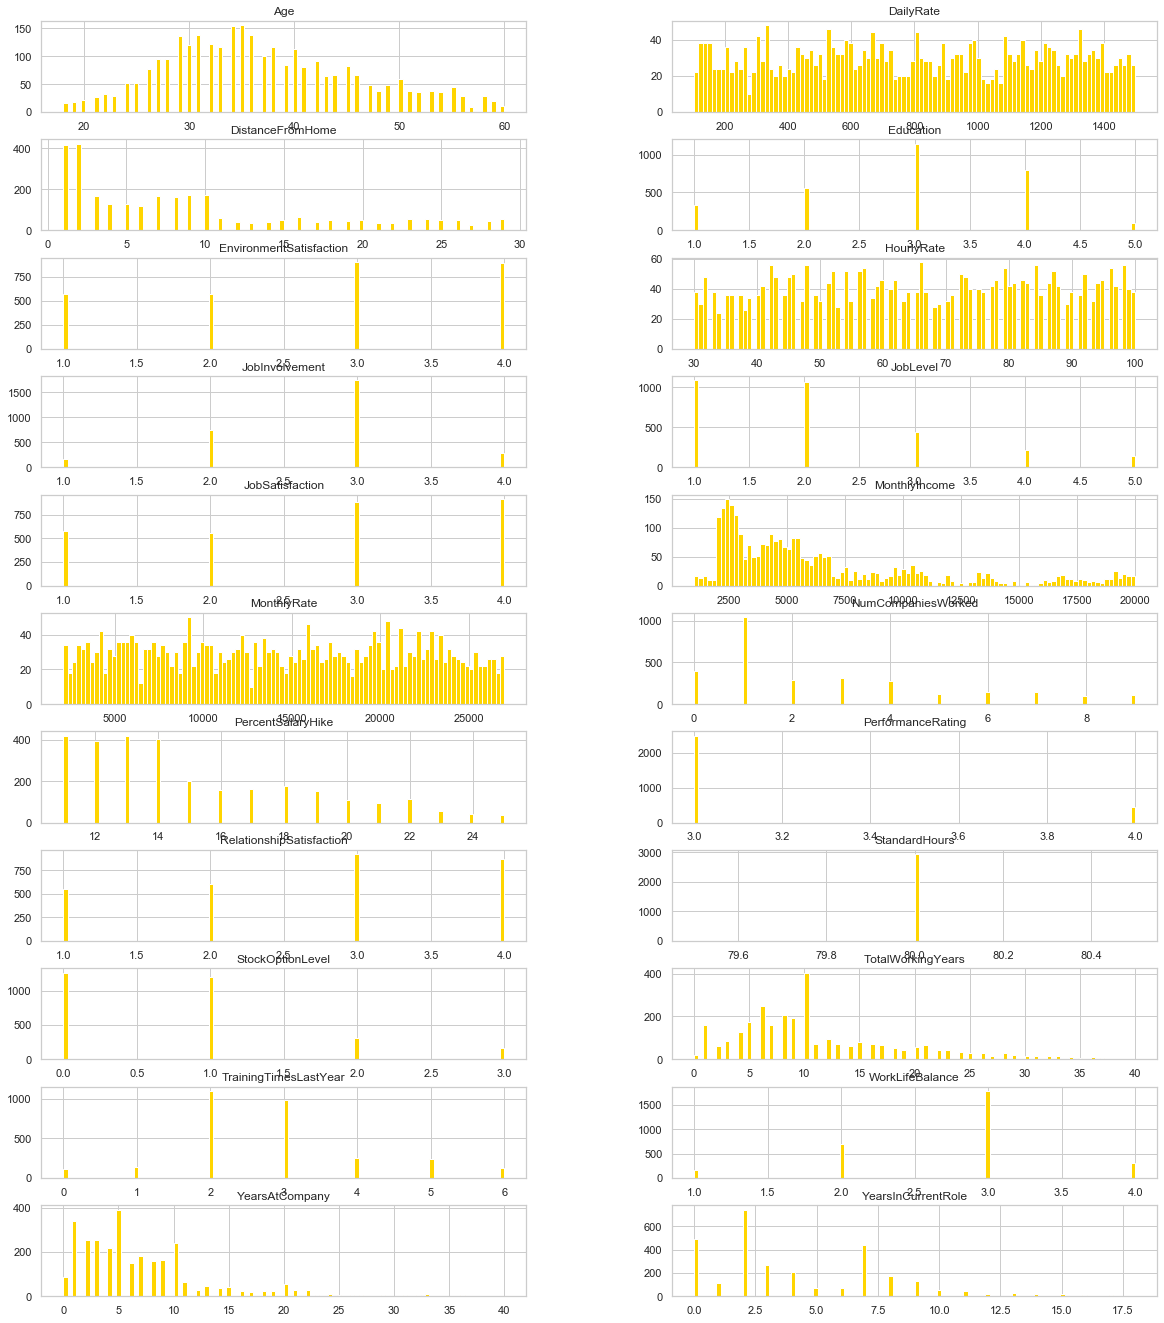

In [16]:
# Visualizing Summary Statistics of the HR data distribution, using Histograms for each column, and excluding the Employee Number and the Attrition column

columns = list(HR_Data2)[0:-2]
HR_Data[columns].hist(stacked=False, bins=100, figsize=(20,30), layout=(14,2)); 

# Plot Histogram for all other 32 columns

In [17]:
# Visualize Distance from home to work
HR_Data2_Dist = HR_Data2['DistanceFromHome']

(array([ 416.,  422.,  168.,  128.,  130.,  118.,  168.,  160.,  170.,
         172.,   58.,   40.,   38.,   42.,    0.,   52.,   64.,   40.,
          52.,   44.,   50.,   36.,   38.,   54.,   56.,   50.,   50.,
          24.,   46.,   54.]),
 array([  1.        ,   1.93333333,   2.86666667,   3.8       ,
          4.73333333,   5.66666667,   6.6       ,   7.53333333,
          8.46666667,   9.4       ,  10.33333333,  11.26666667,
         12.2       ,  13.13333333,  14.06666667,  15.        ,
         15.93333333,  16.86666667,  17.8       ,  18.73333333,
         19.66666667,  20.6       ,  21.53333333,  22.46666667,
         23.4       ,  24.33333333,  25.26666667,  26.2       ,
         27.13333333,  28.06666667,  29.        ]),
 <a list of 30 Patch objects>)

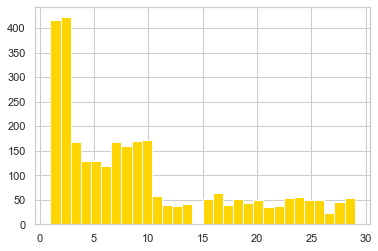

In [18]:
# Visualizing Summary Statistics of the Bank data distribution

plt.hist(HR_Data2_Dist, bins=30)

####  There is some +ve skeweness in the data for distance ravlled from home

In [19]:
# Visualize Distance from home to work
HR_Data_JobSat = HR_Data2['DistanceFromHome']

(array([ 838.,  168.,  258.,  118.,  168.,  330.,  172.,   98.,   38.,
          42.,  116.,   40.,   96.,   50.,   36.,   92.,   56.,  100.,
          24.,  100.]),
 array([  1. ,   2.4,   3.8,   5.2,   6.6,   8. ,   9.4,  10.8,  12.2,
         13.6,  15. ,  16.4,  17.8,  19.2,  20.6,  22. ,  23.4,  24.8,
         26.2,  27.6,  29. ]),
 <a list of 20 Patch objects>)

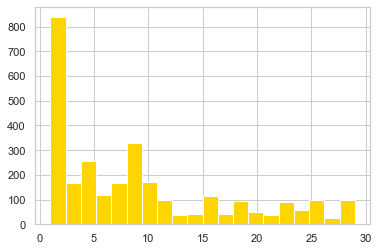

In [20]:
# Visualizing Summary Statistics of the Bank data distribution

plt.hist(HR_Data_JobSat, bins=20)
# HR_Data.hist(figsize=(20,30))

####  There is some +ve skeweness in the data for Job Satisfaction

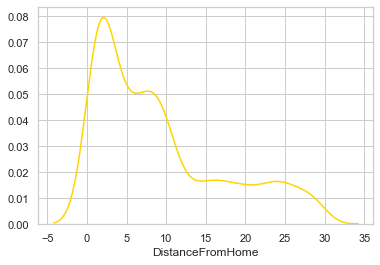

In [21]:
sns.distplot(HR_Data_JobSat, hist =False)

### 2b. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship. Visualize the analysis using boxplots and pair plots, histograms or density curves. Get the data model ready. (10 marks)

In [22]:
HR_Data2.head(10)

Attrition  Age     BusinessTravel  DailyRate              Department  \
0       Yes   41      Travel_Rarely       1102                   Sales   
1        No   49  Travel_Frequently        279  Research & Development   
2       Yes   37      Travel_Rarely       1373  Research & Development   
3        No   33  Travel_Frequently       1392  Research & Development   
4        No   27      Travel_Rarely        591  Research & Development   
5        No   32  Travel_Frequently       1005  Research & Development   
6        No   59      Travel_Rarely       1324  Research & Development   
7        No   30      Travel_Rarely       1358  Research & Development   
8        No   38  Travel_Frequently        216  Research & Development   
9        No   36      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   
5                 2          2  Life Sciences                        4   
6                 3          3        Medical                        3   
7                24          1  Life Sciences                        4   
8                23          3  Life Sciences                        4   
9                27          3        Medical                        3   

   Gender  ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0  Female  ...                         1             80                 0   
1    Male  ...                         4             80                 1   
2    Male  ...                         2             80                 0   
3  Female  ...                         3             80                 0   
4    Male  ...                         4             80                 1   
5    Male  ...                         3             80                 0   
6  Female  ...                         1             80                 3   
7    Male  ...                         2             80                 1   
8    Male  ...                         2             80                 0   
9    Male  ...                         2             80                 2   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   
5                 8                      2               2               7   
6                12                      3               2               1   
7                 1                      2               3               1   
8                10                      2               3               9   
9                17                      3               2               7   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  
5                   7                        3                    6  
6                   0                        0                    0  
7                   0                        0                    0  
8                   7              

### Identify Correlation in the data

In [23]:
# Check correlations in the data
HR_Data2.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StandardHours                                 NaN         NaN             NaN   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  M

In [24]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

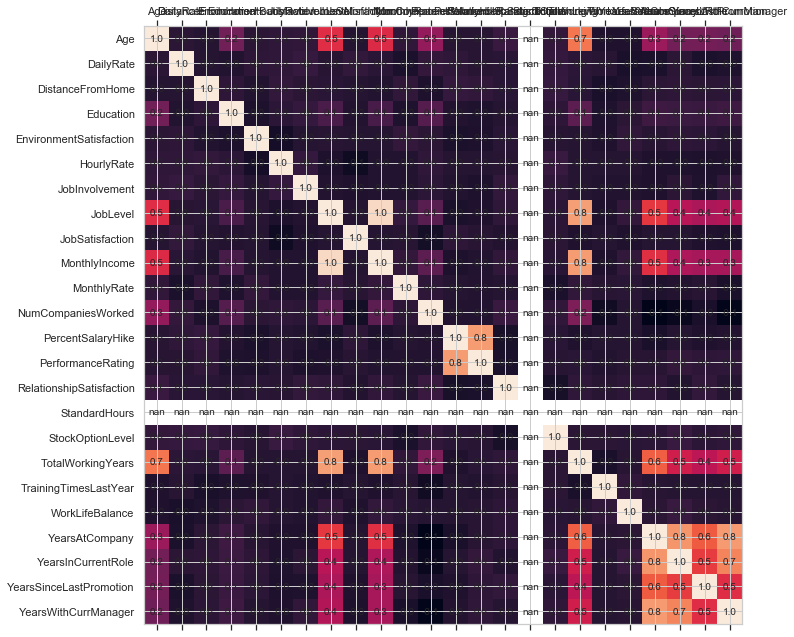

In [25]:
# Show Heatmap of all the correlations

plot_corr(HR_Data2)

#### Observation: In the heatmap above, white represents the maximum correlation, and red the minimun correlation. Here it shows that the Monthly Income is highly correlatted to the job level.

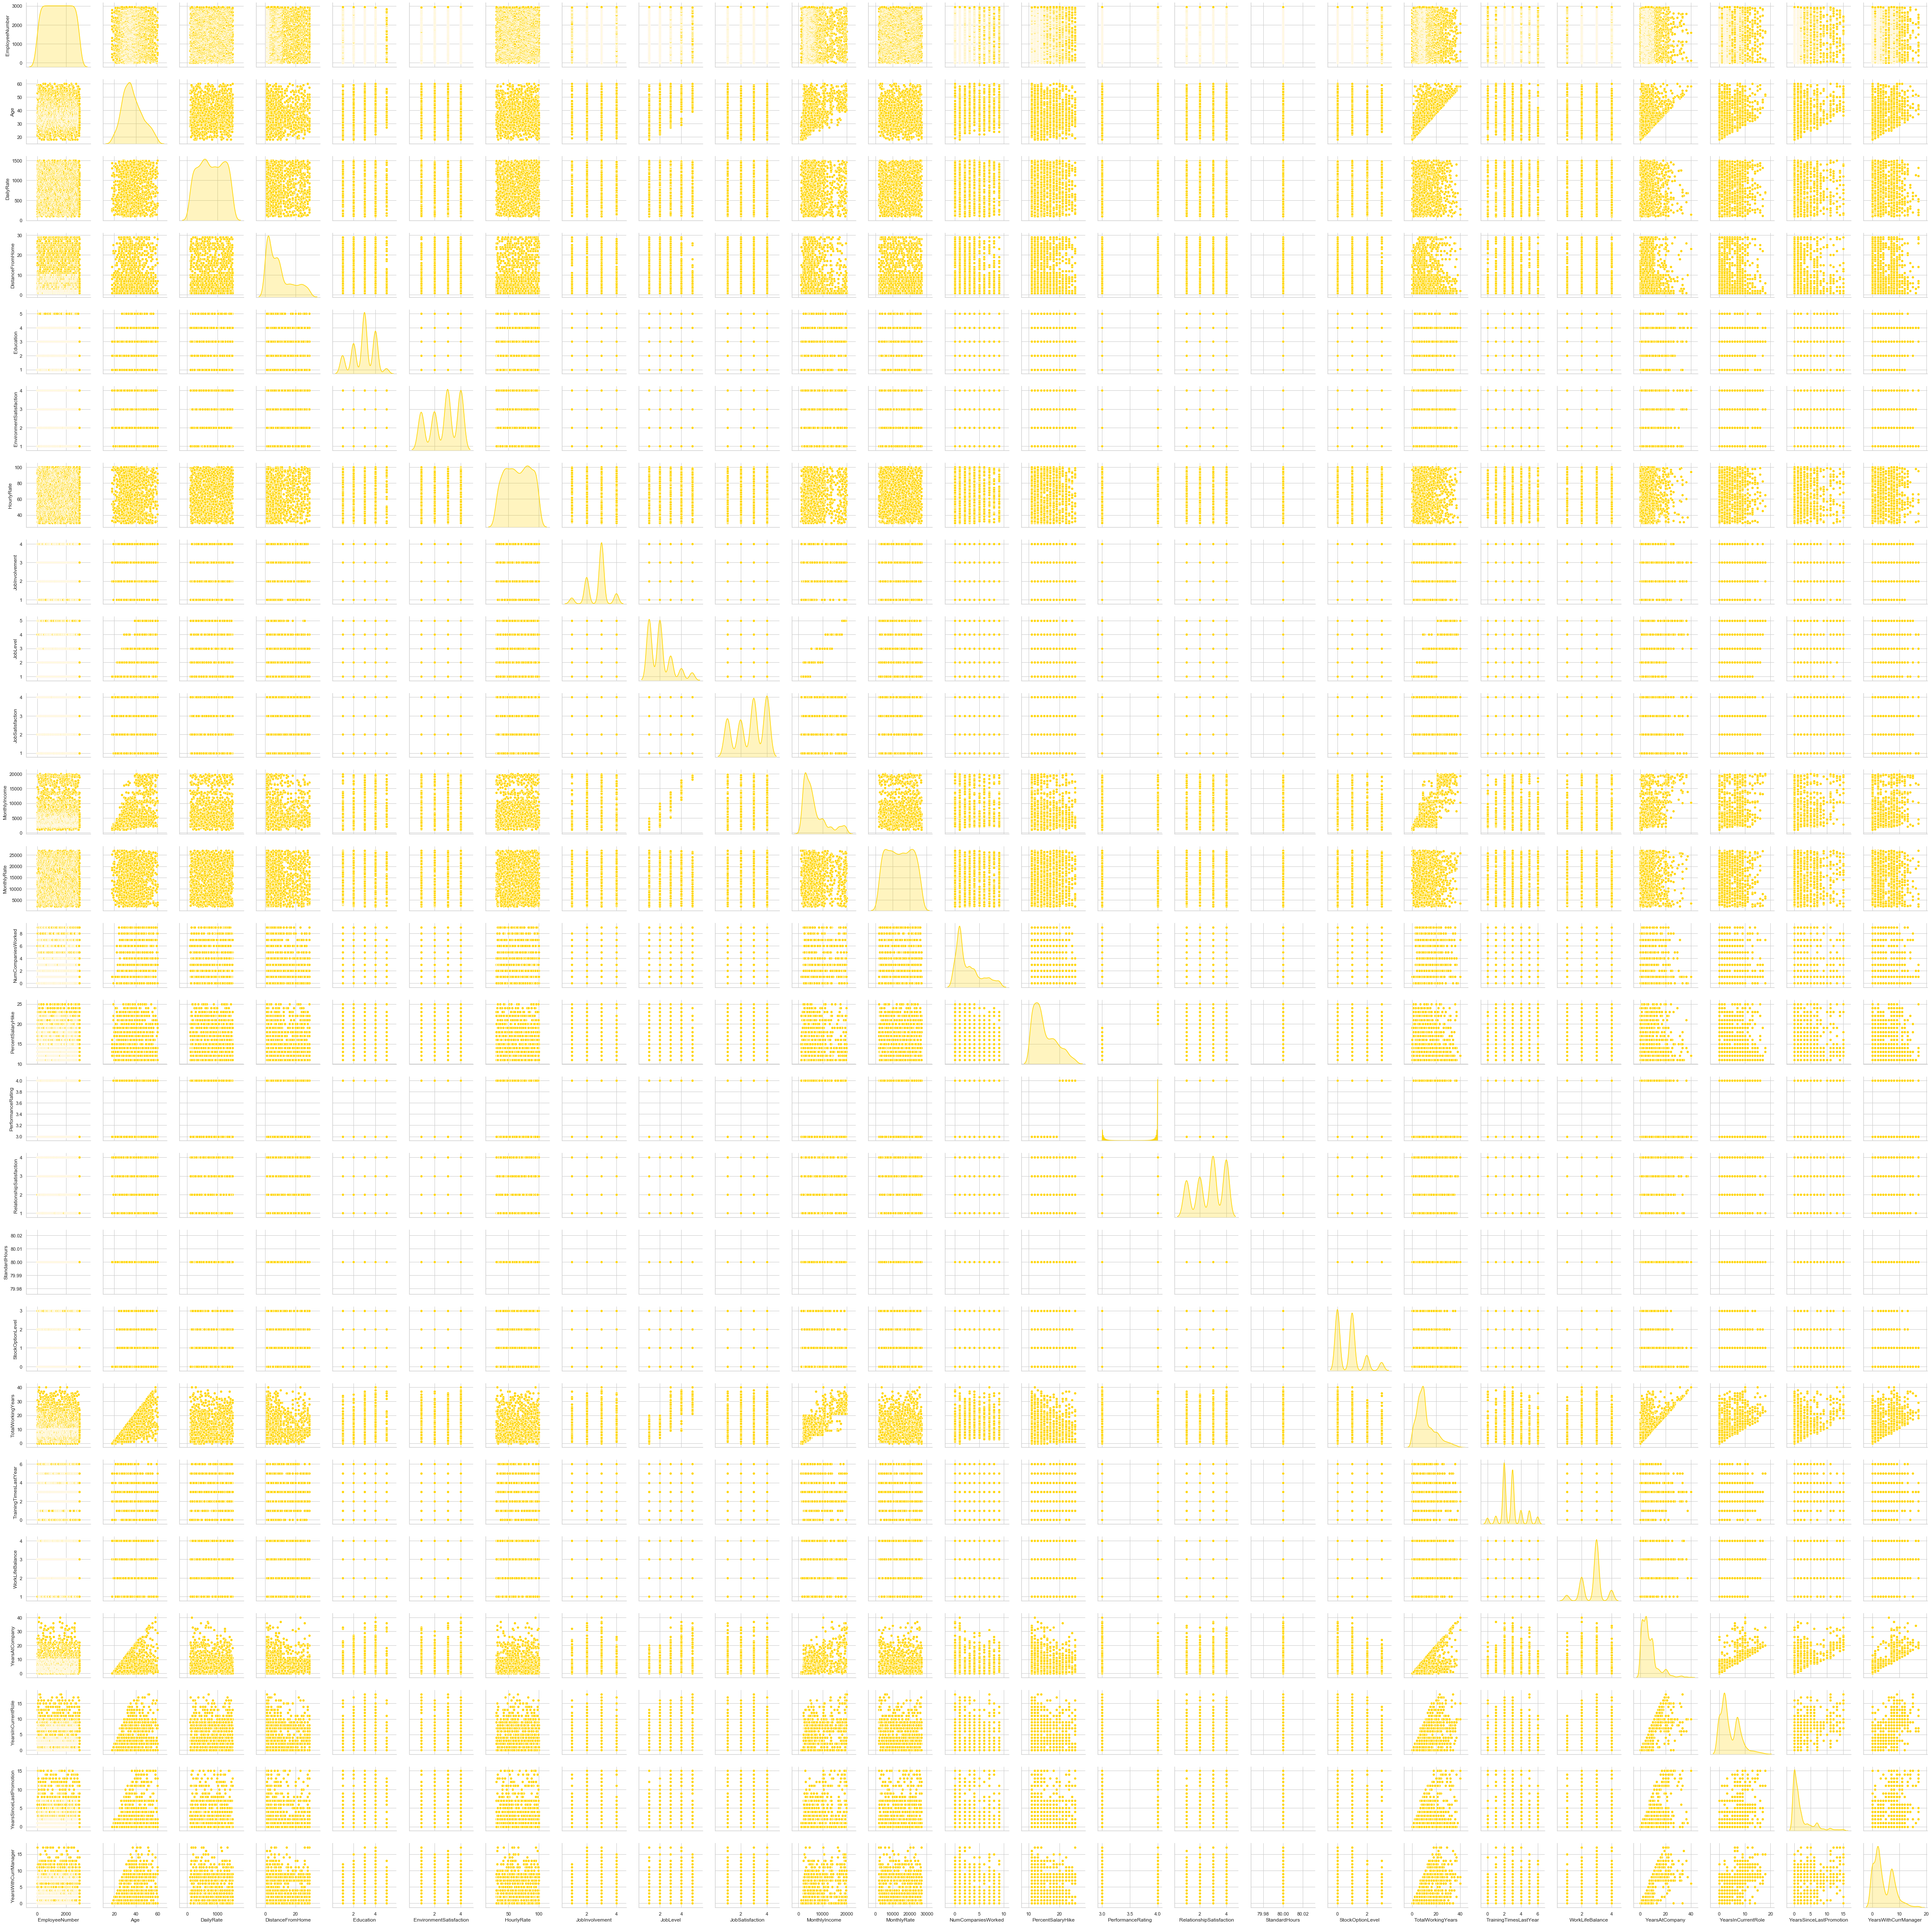

In [26]:
# Visualize using scatter plots for all the columns, to show the kind of relationships between the variables.

sns.pairplot(HR_Data,diag_kind='kde')

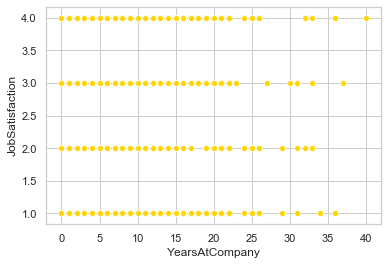

In [27]:
# We will analyse the bivariant variables below 
sns.scatterplot(HR_Data['YearsAtCompany'], HR_Data['JobSatisfaction'])

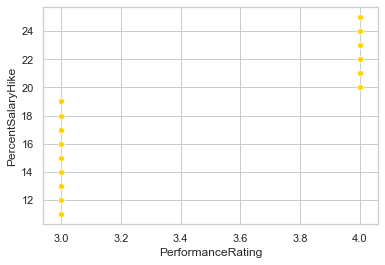

In [28]:
sns.scatterplot(HR_Data['PerformanceRating'], HR_Data['PercentSalaryHike'])

#### Observation: The higher the performance rating, the higher the salary hike

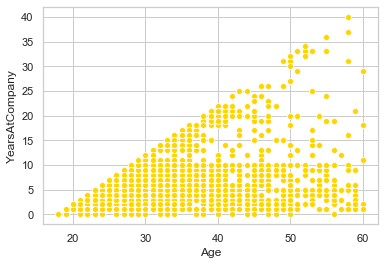

In [29]:
sns.scatterplot(HR_Data['Age'], HR_Data['YearsAtCompany'])

#### Observation: Age is positively correlated to the number of Years at the Company

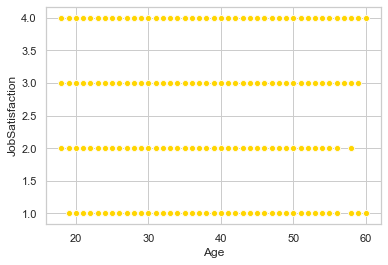

In [30]:
sns.scatterplot(HR_Data['Age'], HR_Data['JobSatisfaction'])

#### Observation: Generally age has no bearing to Job satisfaction 

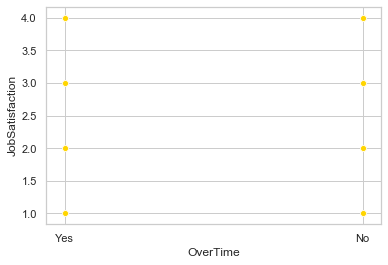

In [31]:
sns.scatterplot(HR_Data['OverTime'], HR_Data['JobSatisfaction'])


#### Generally Job satsifaction is not determined or affacted by age 

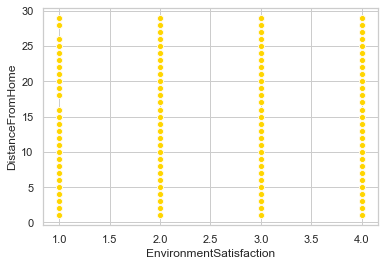

In [32]:
sns.scatterplot(HR_Data['EnvironmentSatisfaction'], HR_Data['DistanceFromHome'])

#### And Environemnt satsifaction is not determined or affacted by distance from work/home 

#### Analysing between various categorcal variables (Bi-variant variables)

In [33]:
pd.crosstab(HR_Data['MaritalStatus'], HR_Data['JobSatisfaction']) # Most staff have a afairly good job satisfaction

JobSatisfaction    1    2    3    4
MaritalStatus                      
Divorced         140  122  188  204
Married          260  262  424  400
Single           178  176  272  314

In [34]:
pd.crosstab(HR_Data['MaritalStatus'], HR_Data['WorkLifeBalance']) # most staff who are married have more work-life balance

WorkLifeBalance   1    2    3    4
MaritalStatus                     
Divorced         26  176  388   64
Married          84  306  810  146
Single           50  206  588   96

In [35]:
pd.crosstab(HR_Data['Gender'], HR_Data['JobSatisfaction'])

JobSatisfaction    1    2    3    4
Gender                             
Female           238  236  362  340
Male             340  324  522  578

In [36]:

pd.crosstab(HR_Data['PerformanceRating'], HR_Data['JobSatisfaction'])

JobSatisfaction      1    2    3    4
PerformanceRating                    
3                  482  474  772  760
4                   96   86  112  158

#### Most staff who have been well rated have better job satisfaction, and may not be likely to leave 

In [37]:
pd.crosstab(HR_Data['Gender'], HR_Data['WorkLifeBalance'])

WorkLifeBalance    1    2     3    4
Gender                              
Female            60  272   730  114
Male             100  416  1056  192

In [38]:
pd.crosstab(HR_Data['Gender'], HR_Data['Attrition'])

Attrition    No  Yes
Gender              
Female     1002  174
Male       1464  300

#### More males are likely to 'attrite'

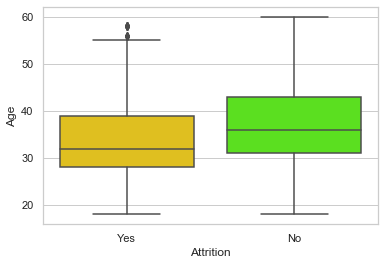

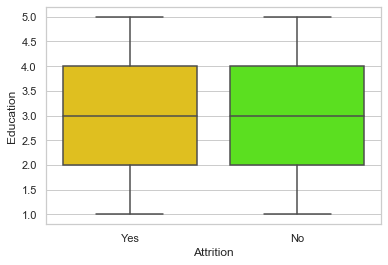

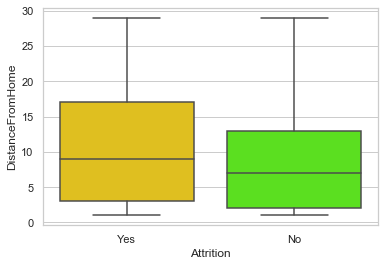

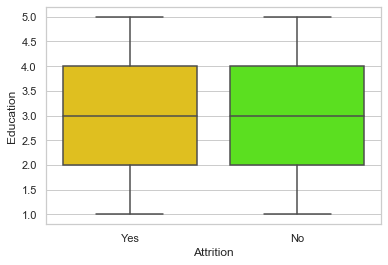

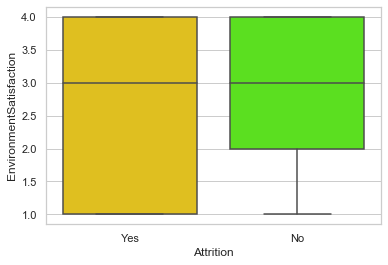

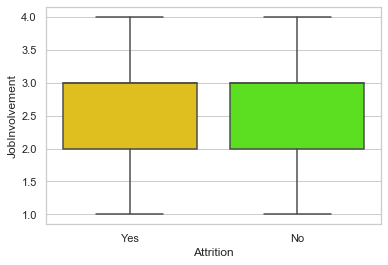

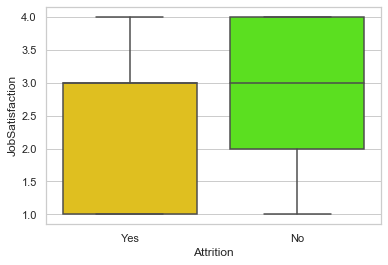

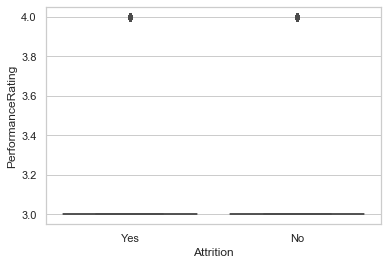

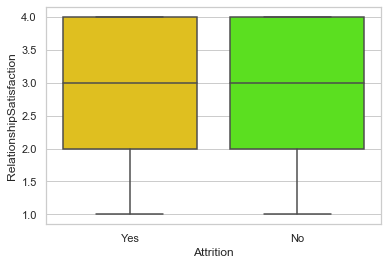

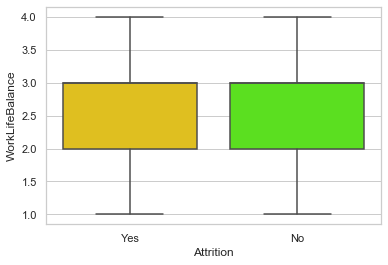

In [39]:
for i in ['Age','Education','DistanceFromHome','Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']:
    sns.boxplot(x='Attrition',y=i,data=HR_Data2)
    plt.show()

In [40]:
#Group numerical variables by mean for the classes of Y variable
np.round(HR_Data2.groupby(["Attrition"]).mean() ,1)

Age  DailyRate  DistanceFromHome  Education  \
Attrition                                                 
No         37.6      812.5               8.9        2.9   
Yes        33.6      750.4              10.6        2.8   

           EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Attrition                                                                  
No                             2.8        66.0             2.8       2.1   
Yes                            2.5        65.6             2.5       1.6   

           JobSatisfaction  MonthlyIncome  ...  RelationshipSatisfaction  \
Attrition                                  ...                             
No                     2.8         6832.7  ...                       2.7   
Yes                    2.5         4787.1  ...                       2.6   

           StandardHours  StockOptionLevel  TotalWorkingYears  \
Attrition                                                       
No                  80.0               0.8               11.9   
Yes                 80.0               0.5                8.2   

           TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Attrition                                                           
No                           2.8              2.8             7.4   
Yes                          2.6              2.7             5.1   

           YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
Attrition                                                                     
No                        4.5                      2.2                   4.4  
Yes                       2.9                      1.9                   2.9  

[2 rows x 24 columns]

#### Observation: Attrition is higher for staff 
1. Further from the Office/home
2. The other factors do not seem to have a higher attrition rate

#### Bivariate analysis using crosstab for categorical values

In [41]:
pd.crosstab(HR_Data2['Education'], HR_Data2['Attrition'], normalize='index').sort_values(by='Education',ascending=False )


Attrition        No       Yes
Education                    
5          0.895833  0.104167
4          0.854271  0.145729
3          0.826923  0.173077
2          0.843972  0.156028
1          0.817647  0.182353

#### Observation: Attrition rate is highest for lower educated staff

In [42]:
pd.crosstab(HR_Data2['JobSatisfaction'], HR_Data2['Attrition'], normalize='index').sort_values(by='JobSatisfaction',ascending=False )

Attrition              No       Yes
JobSatisfaction                    
4                0.886710  0.113290
3                0.834842  0.165158
2                0.835714  0.164286
1                0.771626  0.228374

#### Observation: Attrition rate is highest for  staff experiencing low Job satisfaction

In [43]:
pd.crosstab(HR_Data2['EnvironmentSatisfaction'], HR_Data2['Attrition'], normalize='index').sort_values(by='EnvironmentSatisfaction',ascending=False )

Attrition                      No       Yes
EnvironmentSatisfaction                    
4                        0.865471  0.134529
3                        0.863135  0.136865
2                        0.850174  0.149826
1                        0.746479  0.253521

#### Observation: Attrition rate is highest for  staff experiencing low environment satisfaction

In [44]:
pd.crosstab(HR_Data2['JobInvolvement'], HR_Data2['Attrition'], normalize='index').sort_values(by='JobInvolvement',ascending=False )

Attrition             No       Yes
JobInvolvement                    
4               0.909722  0.090278
3               0.855991  0.144009
2               0.810667  0.189333
1               0.662651  0.337349

#### Observation: Again Attrition rate is highest for staff experiencing low job involvement

In [45]:
pd.crosstab(HR_Data2['PerformanceRating'], HR_Data2['Attrition'], normalize='index').sort_values(by='PerformanceRating',ascending=False )

Attrition                No       Yes
PerformanceRating                    
4                  0.836283  0.163717
3                  0.839228  0.160772

#### Observation: Attrition rate  for staff is not affected very much by Paerformance Rating which ie either 3 or 4, all quite high

## 3. Split data into the training and test data sets in the ratio 70:30 respectively (5 marks) 



### Data Preparation 

In [46]:
HR_Data2.head(10)

Attrition  Age     BusinessTravel  DailyRate              Department  \
0       Yes   41      Travel_Rarely       1102                   Sales   
1        No   49  Travel_Frequently        279  Research & Development   
2       Yes   37      Travel_Rarely       1373  Research & Development   
3        No   33  Travel_Frequently       1392  Research & Development   
4        No   27      Travel_Rarely        591  Research & Development   
5        No   32  Travel_Frequently       1005  Research & Development   
6        No   59      Travel_Rarely       1324  Research & Development   
7        No   30      Travel_Rarely       1358  Research & Development   
8        No   38  Travel_Frequently        216  Research & Development   
9        No   36      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   
5                 2          2  Life Sciences                        4   
6                 3          3        Medical                        3   
7                24          1  Life Sciences                        4   
8                23          3  Life Sciences                        4   
9                27          3        Medical                        3   

   Gender  ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0  Female  ...                         1             80                 0   
1    Male  ...                         4             80                 1   
2    Male  ...                         2             80                 0   
3  Female  ...                         3             80                 0   
4    Male  ...                         4             80                 1   
5    Male  ...                         3             80                 0   
6  Female  ...                         1             80                 3   
7    Male  ...                         2             80                 1   
8    Male  ...                         2             80                 0   
9    Male  ...                         2             80                 2   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   
5                 8                      2               2               7   
6                12                      3               2               1   
7                 1                      2               3               1   
8                10                      2               3               9   
9                17                      3               2               7   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  
5                   7                        3                    6  
6                   0                        0                    0  
7                   0                        0                    0  
8                   7              

#### Will Replace Attrition values 'Yes' with '1' and 'No' with '0' to enable Logistic Regression model to run 

In [65]:
# Replace Attrition values 'Yes' with '1' and 'No' with '0'

HR_Data2['Attrition'] = HR_Data2['Attrition'].replace(['Yes','No'],['  1','  0'])

TypeError: Cannot compare types 'ndarray(dtype=int32)' and 'str'

In [66]:
HR_Data2.head(10)

Attrition  Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0          1   41               2       1102           2                 1   
1          0   49               1        279           1                 8   
2          1   37               2       1373           1                 2   
3          0   33               1       1392           1                 3   
4          0   27               2        591           1                 2   
5          0   32               1       1005           1                 2   
6          0   59               2       1324           1                 3   
7          0   30               2       1358           1                24   
8          0   38               1        216           1                23   
9          0   36               2       1299           1                27   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   
5          2               1                        4       1  ...   
6          3               3                        3       0  ...   
7          1               1                        4       1  ...   
8          3               1                        4       1  ...   
9          3               3                        3       1  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   
5                         3             80                 0   
6                         1             80                 3   
7                         2             80                 1   
8                         2             80                 0   
9                         2             80                 2   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   
5                  8                      2                2               7   
6                 12                      3                2               1   
7                  1                      2                3               1   
8                 10                      2                3               9   
9                 17                      3                2               7   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  
5                   7                        3                     6  
6                   0                        0                     0  
7                   0                        0                     0  
8                   7                        1                     8  
9                   7                        7                     7  

[10 r

In [67]:
# Convert Attrition variable from categorical to float

HR_Data2['Attrition'] = HR_Data2['Attrition'].astype(int)

In [68]:
HR_Data2.head(10)

Attrition  Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0          1   41               2       1102           2                 1   
1          0   49               1        279           1                 8   
2          1   37               2       1373           1                 2   
3          0   33               1       1392           1                 3   
4          0   27               2        591           1                 2   
5          0   32               1       1005           1                 2   
6          0   59               2       1324           1                 3   
7          0   30               2       1358           1                24   
8          0   38               1        216           1                23   
9          0   36               2       1299           1                27   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   
5          2               1                        4       1  ...   
6          3               3                        3       0  ...   
7          1               1                        4       1  ...   
8          3               1                        4       1  ...   
9          3               3                        3       1  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   
5                         3             80                 0   
6                         1             80                 3   
7                         2             80                 1   
8                         2             80                 0   
9                         2             80                 2   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   
5                  8                      2                2               7   
6                 12                      3                2               1   
7                  1                      2                3               1   
8                 10                      2                3               9   
9                 17                      3                2               7   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  
5                   7                        3                     6  
6                   0                        0                     0  
7                   0                        0                     0  
8                   7                        1                     8  
9                   7                        7                     7  

[10 r

## 4.	Use Logistic Regression model to predict whether the employee would leave or not. Print all the metrics related for evaluating the model performance (15 marks).

#### Using 70% for the training dataset and 30% for the test dataset

In [69]:
#Split the data set

X = HR_Data2.drop('Attrition',axis=1)     # Predictor feature columns (1 X m)
Y = HR_Data2['Attrition']   # Predicted Attrition value (Yes=True, No=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
858    53               2       1223           1                 7          2   
551    39               2        141           0                 3          3   
1768   36               1        566           1                18          4   
2830   31               2        471           1                 4          3   
2703   30               2        793           1                16          1   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
858                3                        4       0          50  ...   
551                0                        3       0          44  ...   
1768               1                        3       1          81  ...   
2830               3                        1       0          62  ...   
2703               1                        2       1          33  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
858                          2             80                 1   
551                          3             80                 1   
1768                         4             80                 2   
2830                         2             80                 1   
2703                         2             80                 1   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
858                  26                      6                3   
551                  12                      3                1   
1768                  4                      2                3   
2830                  4                      0                2   
2703                 10                      2                2   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
858                7                   7                        4   
551                8                   3                        3   
1768               1                   0                        0   
2830               2                   2                        2   
2703              10                   0                        0   

      YearsWithCurrManager  
858                      7  
551                      6  
1768                     0  
2830                     2  
2703                     8  

[5 rows x 32 columns]




### Split the dataset

In [70]:
# Check split of the data

print("{0:0.2f}% data is in training set".format((len(x_train)/len(HR_Data2.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(HR_Data2.index)) * 100))

70.00% data is in training set
30.00% data is in test set


#### Observation : The split is more or less the same in the training and test datasets 

In [71]:
n_true = len(HR_Data2.loc[HR_Data2['Attrition'] == 1])
n_false = len(HR_Data2.loc[HR_Data2['Attrition'] == 0])
print("Number of Attrition cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of Non-Attrition cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of Attrition cases: 474 (16.12%)
Number of Non-Attrition cases: 2466 (83.88%)


#### Observation : No. of Attrition cases is about 16% and Non-Attrition cases is abiut 84%

In [72]:
# Check the True  & False ratios in the split datasets
print("Original Dataset Attrition -  True Values  : {0} ({1:0.2f}%)".format(len(HR_Data2.loc[HR_Data2['Attrition'] == 1]), (len(HR_Data2.loc[HR_Data2['Attrition'] == 1])/len(HR_Data2.index)) * 100))
print("Original Dataset Attrition -  False Values : {0} ({1:0.2f}%)".format(len(HR_Data2.loc[HR_Data2['Attrition'] == 0]), (len(HR_Data2.loc[HR_Data2['Attrition'] == 0])/len(HR_Data2.index)) * 100))
print("")
print("Training Dataset Attrition - True Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Dataset Attrition - False Values  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Dataset Attrition - True Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 'Yes'])/len(y_test)) * 100))
print("Test Dataset Attrition - False Values      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Dataset Attrition -  True Values  : 474 (16.12%)
Original Dataset Attrition -  False Values : 2466 (83.88%)

Training Dataset Attrition - True Values   : 321 (15.60%)
Training Dataset Attrition - False Values  : 1737 (84.40%)

Test Dataset Attrition - True Values       : 153 (0.00%)
Test Dataset Attrition - False Values      : 729 (82.65%)



In [73]:
HR_Data2.head(10)

Attrition  Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0          1   41               2       1102           2                 1   
1          0   49               1        279           1                 8   
2          1   37               2       1373           1                 2   
3          0   33               1       1392           1                 3   
4          0   27               2        591           1                 2   
5          0   32               1       1005           1                 2   
6          0   59               2       1324           1                 3   
7          0   30               2       1358           1                24   
8          0   38               1        216           1                23   
9          0   36               2       1299           1                27   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   
5          2               1                        4       1  ...   
6          3               3                        3       0  ...   
7          1               1                        4       1  ...   
8          3               1                        4       1  ...   
9          3               3                        3       1  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   
5                         3             80                 0   
6                         1             80                 3   
7                         2             80                 1   
8                         2             80                 0   
9                         2             80                 2   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   
5                  8                      2                2               7   
6                 12                      3                2               1   
7                  1                      2                3               1   
8                 10                      2                3               9   
9                 17                      3                2               7   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  
5                   7                        3                     6  
6                   0                        0                     0  
7                   0                        0                     0  
8                   7                        1                     8  
9                   7                        7                     7  

[10 r

In [74]:
# Convert Attrition variable from categorical to float

HR_Data2['Attrition'] = HR_Data2['Attrition'].astype(int)

In [75]:
from sklearn.preprocessing import LabelEncoder

for Attrition in HR_Data2.columns:
    if HR_Data2[Attrition].dtype == type(object):
        le = LabelEncoder()
        HR_Data2[Attrition] = le.fit_transform(HR_Data2[Attrition])

In [76]:
HR_Data2.head(10)

Attrition  Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0          1   41               2       1102           2                 1   
1          0   49               1        279           1                 8   
2          1   37               2       1373           1                 2   
3          0   33               1       1392           1                 3   
4          0   27               2        591           1                 2   
5          0   32               1       1005           1                 2   
6          0   59               2       1324           1                 3   
7          0   30               2       1358           1                24   
8          0   38               1        216           1                23   
9          0   36               2       1299           1                27   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   
5          2               1                        4       1  ...   
6          3               3                        3       0  ...   
7          1               1                        4       1  ...   
8          3               1                        4       1  ...   
9          3               3                        3       1  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   
5                         3             80                 0   
6                         1             80                 3   
7                         2             80                 1   
8                         2             80                 0   
9                         2             80                 2   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   
5                  8                      2                2               7   
6                 12                      3                2               1   
7                  1                      2                3               1   
8                 10                      2                3               9   
9                 17                      3                2               7   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  
5                   7                        3                     6  
6                   0                        0                     0  
7                   0                        0                     0  
8                   7                        1                     8  
9                   7                        7                     7  

[10 r

In [77]:
# Confirm the data type for Attrition

print(HR_Data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 33 columns):
Attrition                   2940 non-null int32
Age                         2940 non-null int64
BusinessTravel              2940 non-null int32
DailyRate                   2940 non-null int64
Department                  2940 non-null int32
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null int32
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null int32
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null int32
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null int32
MonthlyIncome               2940 non-null int64
MonthlyRate                 2940 non-null int64
NumCompaniesWorked          2

### Use Logistic Regression for prediction

In [78]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# X = X.apply(pd.to_numeric, errors='coerce')
# Y = Y.apply(pd.to_numeric, errors='coerce')

# Fit the model on train
model = LogisticRegression(solver="liblinear")

model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.028765  0.000867 -0.000121  0.153687  0.035742  0.064363  0.058769   

          7         8         9  ...        23        24        25        26  \
0 -0.339654  0.102621 -0.000059  ...  0.043122 -0.364535 -0.039987 -0.202028   

         27        28        29        30        31  intercept  
0 -0.209336  0.036576 -0.122059  0.193703 -0.119599   0.000539  

[1 rows x 33 columns]


In [79]:
# Score the Logistic Regression Model

score_model = model.score(x_test, y_test)

print(score_model)

0.853741496599


In [80]:
# Score the Logistic Regression Model
model_score = model.score(x_test, y_test)
print(model_score)

0.853741496599


In [81]:
CM=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

print(CM)

[[ 39 114]
 [ 15 714]]


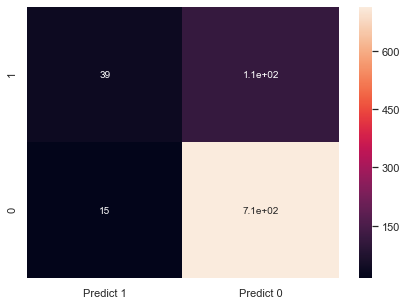

In [82]:
# Use Confusion Metrics (CM) to visualize the prediction 

CM=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(CM, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Observation The confusion matrix

True Positives (TP): shows we predicted correctly staff who will Attrit:  39

True Negatives (TN): shows we predicted correctly staff who will not Attrit: 714

False Positives (FP): shows we incorrectly predicted staff who will Attrit : 15 i.e. Falsely predicted (positive Type I error)

False Negatives (FN): shows we incorrectly predicted staff who will not Attrit : 114 i.e. Falsely predicted ( negative Type II error)

## 5.	Give your reasoning on how can the model perform better? (10 marks) Hint: Check parameter 

### Evaluating Model Performance

#### Recommendation for better model performance

1. Need to have more data with which more analysis can be made.
2. Can use other Classification models and compare teh accuracy, precision and recall and determice which one is more accurate.
3. May need to create more labels or columns to assess t=some of teh variables more

## 6.	Give Business understanding of your model? (5 marks)



#### Observations
1. From the box plots, some younger staff seem to leave more than older staff which could mean the rate of growth in the company is slow. 
2. There is not too much difference with the level of education.
3. Staff leaving firther from the office tend to leave more, could be that they get affacted by the long travelling distances
4. Lower envrionement satsifaction tends to affect some staff more.
5. Job involvement does not matter much for all staff, but better job satisfaction tend to result in more job retention